In [1]:
!pip install pyforest
import pyforest
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ins = pd.read_csv('insuranceLiner.csv')

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
pd.set_option('display.max_rows',100)

In [5]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
li_cat = [i for i in ins.columns if ins[i].dtype == 'O']

In [10]:
li_cat

['sex', 'smoker', 'region']

In [11]:
for i in li_cat:
    ins[i] = le.fit_transform(ins[i])

In [12]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [13]:
from sklearn.model_selection import train_test_split
ins_train, ins_test = train_test_split(ins, test_size = 0.2, random_state =100) 

In [14]:
ins_train_x = ins_train.iloc[:,0:-1]
ins_train_y = ins_train.iloc[:,-1]

In [15]:
ins_test_x = ins_train.iloc[:,0:-1]
ins_test_y = ins_train.iloc[:,-1]

In [16]:
print(ins_train_x.shape)
print(ins_train_y.shape)
print(ins_test_x.shape)
print(ins_test_y.shape)

(1070, 6)
(1070,)
(1070, 6)
(1070,)


In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [18]:
reg.fit(ins_train_x, ins_train_y)

LinearRegression()

In [19]:
pred_train = reg.predict(ins_train_x)
pred_test = reg.predict(ins_test_x)

In [22]:
#Evaluate Performance
Rsquare = reg.score(ins_train_x,ins_train_y)
Rsquare


1: 0.7380305957382405


0.7380305957382405

In [40]:
N=ins_train_x.shape[0]   # Use N and K for Train Data Only

K=ins_train_x.shape[1]

Adjusted_R2=1-((1-Rsquare)*(N-1)/(N-K-1))
Adjusted_R2

0.7365519349427837

In [41]:
error_train= ins_train_y- pred_train
error_test = ins_test_y- pred_test

In [42]:
error_train.mean()

6.710710907006793e-13

<IPython.core.display.Javascript object>

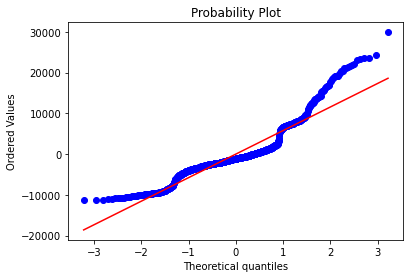

In [49]:
# Probability plot
fig=plt.figure()
stats.probplot(error_train, plot=plt)
plt.show()

<IPython.core.display.Javascript object>

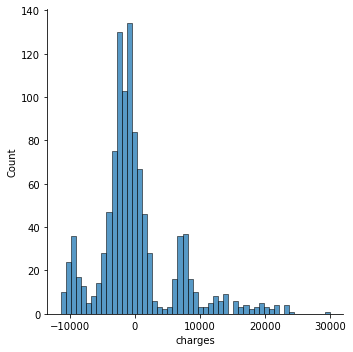

In [50]:
sns.displot(error_train)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

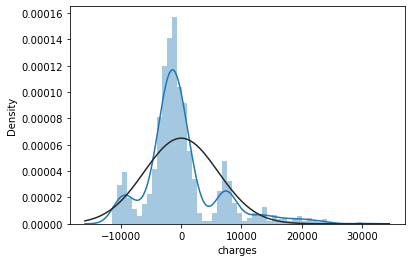

In [51]:
from scipy.stats import norm

sns.distplot(error_train,fit=norm)

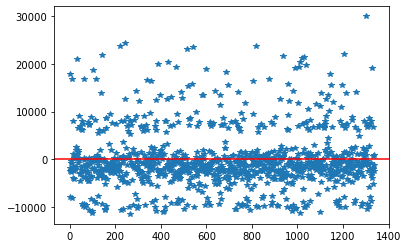

In [52]:
plt.plot(error_train ,"*") # Scatter plot
plt.axhline(y= error_train.mean(),color='r')
plt.show()                 # No patter amoung data errors

In [53]:
error_train.skew()

1.2912346675195279

In [54]:
Act_vs_pred=pd.DataFrame({"Predicted": pred_train,"Actual": ins_train_y,"Difference":(pred_train-ins_train_y)})
Act_vs_pred.sample(10)

,Predicted,Actual,Difference
1228,13350.371370,10594.22570,2756.145670
301,34568.073716,24873.38490,9694.688816
1083,6198.885828,4076.49700,2122.388828
281,40388.428635,48549.17835,-8160.749715
106,1796.139330,2331.51900,-535.379670
589,7904.546252,5976.83110,1927.715152
1266,11474.676461,10704.47000,770.206461
1262,7881.622105,6770.19250,1111.429605
952,5471.956909,4527.18295,944.773959
575,12008.753087,12222.89830,-214.145213


<IPython.core.display.Javascript object>

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


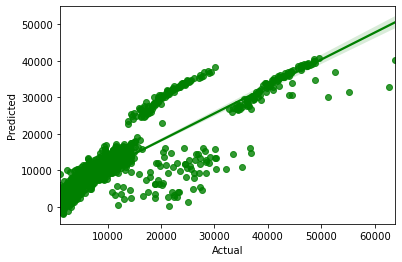

In [55]:
sns.regplot("Actual","Predicted",data=Act_vs_pred,color='g')      # X Must be Actual and Y must be Predicated since Fixed
plt.show()                # Here we can Observe Homoscidacity i.e. Varience around Reg line is same not Vary Much 

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(ins_test_y,pred_test),"MAE")
print(mean_squared_error(ins_test_y,pred_test),"MSE")
print(mean_squared_error(ins_test_y,pred_test,squared=False),"RMSE")

4222.4878987181 MAE
37660918.50680715 MSE
6136.849232856152 RMSE


In [58]:
def remove_outliers(df, col, k=2):
    mean= df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean-k*sd)]
    final_list=[x for x in final_list if (x < mean + k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->", df.shape[0]-df1.shape[0])

In [59]:
remove_outliers(ins, 'charges', k=2)

(1231, 7)
Number of outliers removed--> 107
